# SPOT Kriging in 10 Dimensions: Nyström Approximation vs. Exact (Michalewicz Function)

This notebook demonstrates how to use the `Spot` class from `spotpython` with and without the Nyström approximation for Kriging surrogates on the 10-dimensional Michalewicz function.

We use a maximum of 300 function evaluations.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import Spot
from spotpython.utils.init import fun_control_init, design_control_init, surrogate_control_init

Seed set to 123


## Define the 10D Michalewicz Function

In [2]:
# do not change, these are given by the organizers
dim = 10
lower = np.full(dim, 0)
upper = np.full(dim, np.pi)
fun = Analytical().fun_michalewicz
fun_evals = 300
max_time =  60

## Set up SPOT Controls

## Regression and y as Infill Criterion

In [3]:
init_size = 10
use_nystrom = False
method = "regression"
infill_criterion = "y"
tolerance_x = 1e-12
seed = 321
max_surrogate_points = fun_evals
min_Lambda = -4
max_Lambda = 3
min_theta = -3
max_theta = 2
isotropic = False
kernel = "matern"
kernel_params = {"nu": 1.5}
selection_method = "distance"
min_success_rate = 0.2
max_time = 60

In [4]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=True,
    tensorboard_log=True,
    kernel=kernel,
    kernel_params=kernel_params,
    selection_method=selection_method,
    min_success_rate=min_success_rate,
    max_time=max_time
)
design_control = design_control_init(init_size=init_size)
surrogate_control_exact = surrogate_control_init(use_nystrom=use_nystrom, method=method, max_surrogate_points=max_surrogate_points, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

Seed set to 321


Moving TENSORBOARD_PATH: runs/ to TENSORBOARD_PATH_OLD: runs_OLD/runs_2025_11_04_22_35_09_0
Created spot_tensorboard_path: runs/spot_logs/000_maans08_2025-11-04_22-35-09 for SummaryWriter()


# Sklearn Gaussian Process Regressor as Surrogate

In [5]:
# Needed for the sklearn surrogates:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
S_GP = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
spot_exact_sk = Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control,
    surrogate_control=surrogate_control_exact,
    surrogate=S_GP,
)
spot_exact_sk.run()

spotpython tuning: -1.909128962635467 [----------] 3.67%. Success rate: 0.00% 
spotpython tuning: -2.500391233140745 [----------] 4.00%. Success rate: 50.00% 
spotpython tuning: -3.7993864929683427 [----------] 4.33%. Success rate: 66.67% 
spotpython tuning: -3.7993864929683427 [----------] 4.67%. Success rate: 50.00% 
spotpython tuning: -3.7993864929683427 [----------] 5.00%. Success rate: 40.00% 
spotpython tuning: -4.036629854648265 [#---------] 5.33%. Success rate: 50.00% 
spotpython tuning: -4.365093280498789 [#---------] 5.67%. Success rate: 57.14% 
spotpython tuning: -4.365093280498789 [#---------] 6.00%. Success rate: 50.00% 
spotpython tuning: -4.365093280498789 [#---------] 6.33%. Success rate: 44.44% 
spotpython tuning: -4.365093280498789 [#---------] 6.67%. Success rate: 40.00% 
spotpython tuning: -4.365093280498789 [#---------] 7.00%. Success rate: 36.36% 
spotpython tuning: -4.365093280498789 [#---------] 7.33%. Success rate: 33.33% 
spotpython tuning: -4.563449050736538 

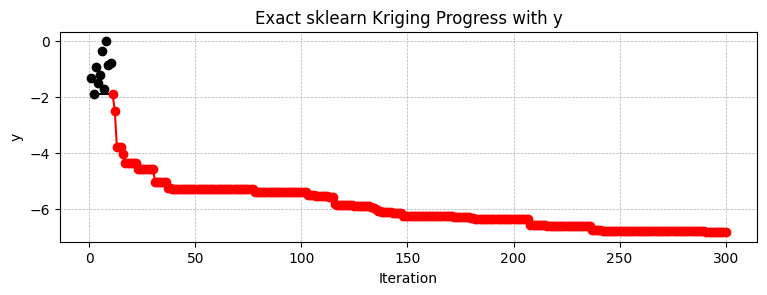

In [6]:
spot_exact_sk.plot_progress(log_y=False, title="Exact sklearn Kriging Progress with y")

In [7]:
print(f"[6D] Exact Kriging y: min y = {spot_exact_sk.min_y:.4f} at x = {spot_exact_sk.min_X}")


[6D] Exact Kriging y: min y = -6.8202 at x = [2.22104319 2.73099039 2.22316405 2.41226872 2.80452182 2.02925052
 1.87914171 1.75677132 1.65957526 1.21634173]
